# Visualizing Omicron: COVID-19 Deaths vs. Cases

## About this project

For most of the COVID-19 pandemic, the daily focus has been on the number of cases. This still seems to be true as the omicron wave hits.

But omicron on the whole has been much milder. For those who have been recently doubly or triple vaccinated and/or recently infected and are free from underlying comorbidities (of which the list is long), the risk of death is very small. The primary risk of this phase of the pandemic is of those not in the above groups getting sick all at once, overwhelming available hospital beds, while the healthcare workforce is itself depleted as workers quarantine or are at home suffering (usually mild) symptoms.

An interesting way to visualize differences in the various peaks is to plot deaths as a function of cases.

The function in <a href="https://github.com/rarnaout/Covidcycles/blob/main/covid_deaths_vs_cases.ipynb">the python notebook</a> `plot_deaths_vs_cases`, does this.

The usual caveats apply regarding reporting, including completeness from some countries and deaths with vs. of COVID-19 (incidental vs. causative).

Please use as you see fit, as long as it's with attribution.

Ramy Arnaout, MD, DPhil / Boston, MA / January 8, 2022

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from colour import Color

Data is from https://github.com/owid/covid-19-data, specifically from JHU (public > data > jhu):

In [2]:
cases  = "https://github.com/owid/covid-19-data/raw/master/public/data/jhu/biweekly_cases_per_million.csv"
deaths = "https://github.com/owid/covid-19-data/raw/master/public/data/jhu/biweekly_deaths_per_million.csv"
df_cases  = pd.read_csv(cases)
df_deaths = pd.read_csv(deaths)

In [3]:
def plot_deaths_vs_cases(country="United States",
                        min_width = 0.5,
                        max_width = 5,
                        start = Color("black"),
                        mid = Color("slategray"),
                        end = Color("red"), 
                        text_at = (0, 125, 295, 475, -1),
                        ):
    #
    # imports
    import pandas as pd
    import numpy as np
    from matplotlib import pyplot as plt
    from colour import Color
    #
    # get data
    df = pd.DataFrame({
        "dates": df_cases['date'],
        "cases": df_cases[country],
        "deaths": df_deaths[country]
         })
    df = df.dropna()
    cases  = list(df.cases)
    deaths = list(df.deaths)
    dates = list(df.dates)
    first_date = dates[0]
    last_date = dates[-1]
    L = len(df)
    #
    # set cosmetics
    colors =  list(i.hex for i in start.range_to(mid, int(round(L/2))))
    colors += list(i.hex for i in mid.range_to(end, int(round(L/2))))
    alphas = [i/L for i in range(L)]
    widths = [(max_width-min_width)*(i/L)**2+min_width for i in range(L)]
    #
    # create figure
    plt.figure(figsize=(6,6))
    for i in range(L-1):
        plt.plot(cases[i:i+2], deaths[i:i+2], c=colors[i], linewidth=widths[i]) #, alpha=alphas[i])
    # some text
    for i in text_at:
        plt.text(cases[i], deaths[i], dates[i], color=colors[i])
    #
    # apply cosmetics    
    plt.xlabel("Biweekly cases per million")
    plt.ylabel("Biweekly deaths per million")
    plt.tight_layout()
    plt.title(f"{country} Deaths vs. Cases,\n{first_date} to {last_date}")
    plt.tight_layout()
    plt.show()
    return

Let's look at some examples. In all the plots below, black -> gray is earler, and green -> orange -> red is later, with the final timepoint in red.

The line thickens slightly as it approaches the present day.

Note the differences in scale from plot to plot.

## South Africa

South Africa had one of the earliest omicron waves.

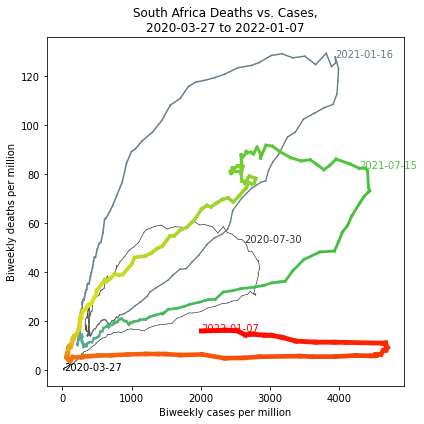

In [4]:
plot_deaths_vs_cases("South Africa")

Note the counterclockwise loops. Cases rise, then deaths rise, then cases fall, and finally deaths fall.

Alpha, beta, delta, and omicron waves are clearly visible. Two mid-summer peaks, two mid-winter peaks.

The shape and area of each loop indicate the lag time between getting sick and dying, and also the deadliness of each wave.

## United States

Testing (and therefore the number of cases) has remained difficult to get and deaths have remained stubbornly high in the United States.

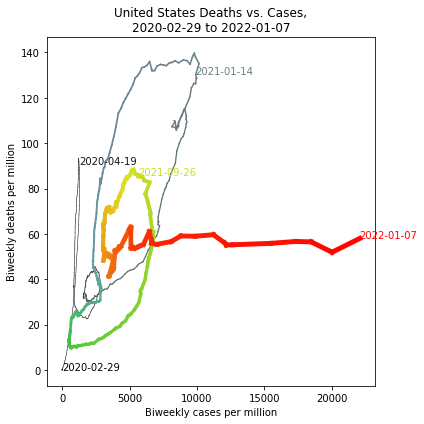

In [5]:
plot_deaths_vs_cases("United States", text_at=(0, 50, 320, 575, -1))

The omicron wave has begun quite differently from previous waves. Hopefully it resolves as South Africa's has so far.

## Italy

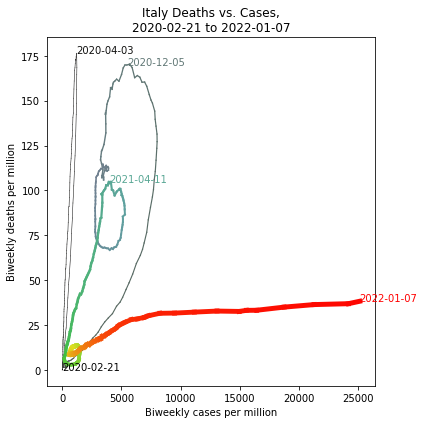

In [6]:
plot_deaths_vs_cases("Italy", text_at=(0, 42, 288, 415, -1))

Famously hard-hit in the first wave. Note the April 2021 resurgence before the December 2020 peak had fully resolved, and how differently omicron has begun.

## Netherlands

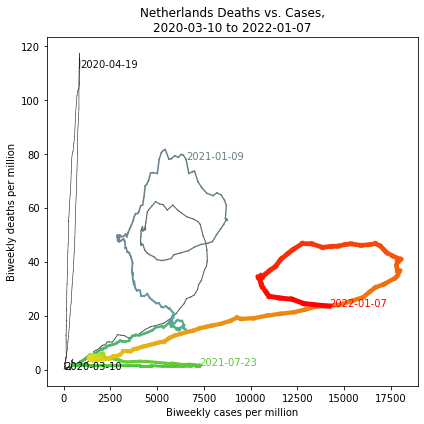

In [7]:
plot_deaths_vs_cases("Netherlands", text_at=(0, 40, 305, 500, -1))

Good reporting. The green wave, which was dominated by the delta variant in other countries, was relatively mild compared to the current wave (red).

## Denmark

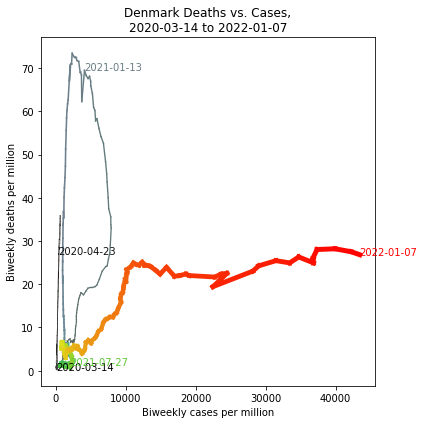

In [8]:
plot_deaths_vs_cases("Denmark", text_at=(0, 40, 305, 500, -1))

A lot of virus sequencing in Denmark. A relatively quiet pandemic until omicron.

## United Kingdom

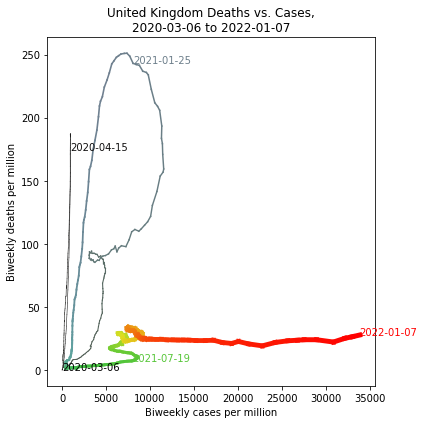

In [9]:
plot_deaths_vs_cases("United Kingdom", text_at=(0, 40, 325, 500, -1))

A relatively mild delta wave.

## Sweden

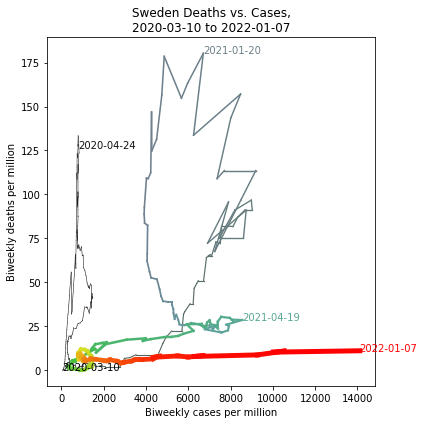

In [10]:
plot_deaths_vs_cases("Sweden", text_at=(0, 45, 316, 405, -1))

Famously an outlier in its early approach. The spikiness suggests to me a data-reporting issue. A spike in April 2021.

## Germany

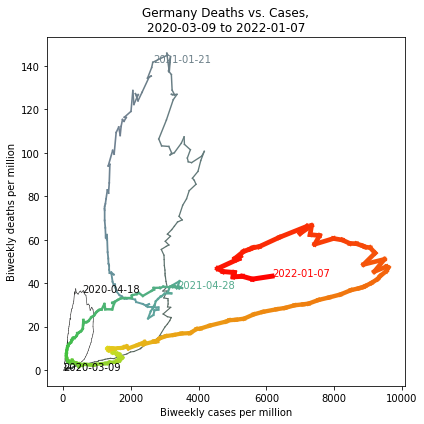

In [11]:
plot_deaths_vs_cases("Germany", text_at=(0, 40, 318, 415, -1))

The second-most populous European country. Fewer loops, but again a dramatic difference in loop orientation, illustrating much different effect. Suspect omicron is yet to hit.

## Israel

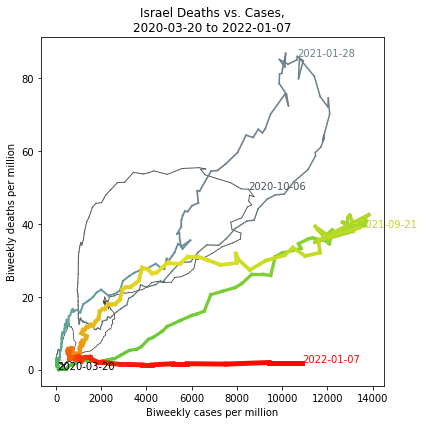

In [12]:
plot_deaths_vs_cases("Israel", text_at=(0, 200, 314, 550, -1))

A highly vaccinated population. Omicron deaths are quite low. As with South Africa, note the flattening of subsequent waves, indicating progressive fall in case mortality.

## Japan

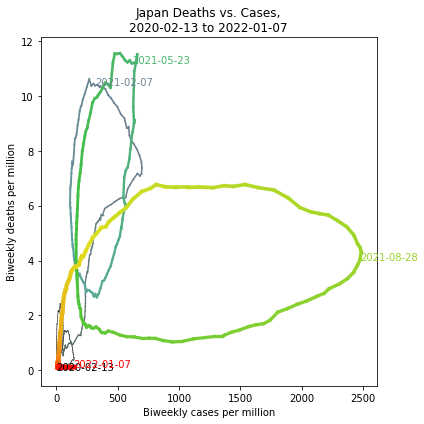

In [13]:
plot_deaths_vs_cases("Japan", text_at=(0, 360, 465, 562, -1))

The August 2021 peak saw many more cases but many fewer deaths than the two previous ones. What changed for Japan between May and August? The omicron wave has yet to hit Japan... or if this is it, it is remarkable.

## China

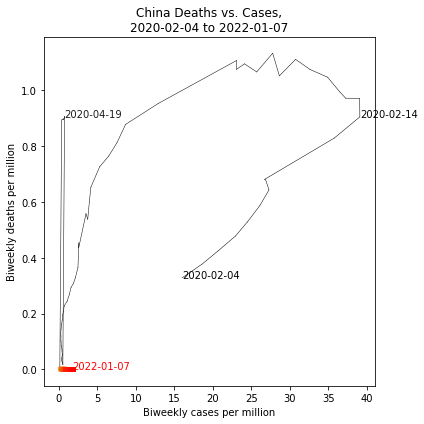

In [14]:
plot_deaths_vs_cases("China", text_at=(0, 10, 75, -1))

A zero-COVID policy. Very different trajectories. Note the axis units.

## Australia

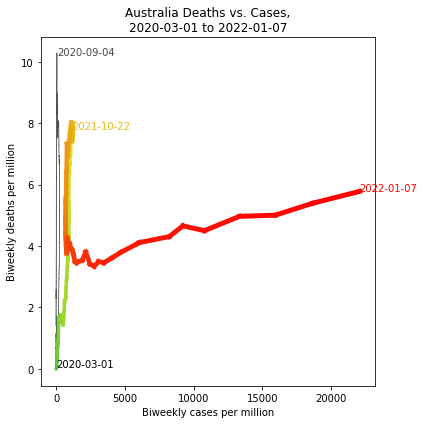

In [15]:
plot_deaths_vs_cases("Australia", text_at=(0, 187, 600, -1))

Another country with tight controls. In January 2021 Australia decided omicron was uncontainable.

## New Zealand

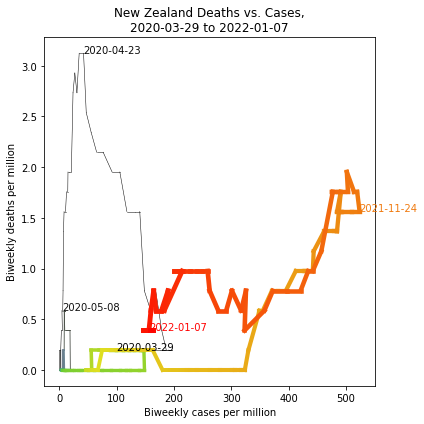

In [16]:
plot_deaths_vs_cases("New Zealand", text_at=(0, 25, 40, 605, -1))

Small, distant, tight controls, unified populace, distinctive trajectories.